# import

`-` 코랩환경에서 아래 순서대로 진행해야 `ISLP` 패키지 설치시 오류가 발생하지 않는다.

1. 드라이브 마운트

2. 현재 작업중인 경로로 이동

3. 패키지 import

```python
from google.colab import drive
drive.mount('/content/drive')
```

```python
cd /content/drive/MyDrive/Colab Notebooks/ISLP/Linear Regression
```

In [1]:
#pip install ISLP

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"

from ISLP import load_data

import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
summarize,poly)

# Overview

`-` 정의 : 한 개의 예측변수 $x$를 이용하여 반응변수 $y$를 예측하기 위한 모델링을 수행한다.

## 표현1. 단순선형회귀

$$\hat {y} = \hat {\beta}_1x + \hat {\beta}_0$$

## 표현 2 ($\star\star\star$)

`-` 표현 2가 자주 쓰이니 잘 알아두자.

$$\bf \hat Y = X \hat {\boldsymbol{\beta}} = \begin{bmatrix}
1  & x_1 \\ 1 & x_2  \\ \dots & \dots \\  1  & x_n\end{bmatrix}\begin{bmatrix} \hat \beta_0  \\ \hat \beta_1 \end{bmatrix} $$

## 잔차(residual)

`-` $\hat y_i = \hat{\beta_1} + \hat {\beta}_0x_i$는 개별 관측치 $x_i$가 주어졌을때 $i$ 번째 $y$의 추정치이다.

`-`  잔차는 표본으로부터 추정된 예측값에서 실제값의 차이로 다음과 같이 정의한다.

$$e_i = \hat {y}_i - y_i,  \quad e_i \sim N(0,\sigma^2)$$

`-`    그리고 책에서는 `잔차제곱합`을 다음과 같이 표현하니 눈에 익혀두자

$$RSS =\sum_{i=1}^{n} e_i$$

## 회귀계수 추정 1. 단순선형회귀

`-` 잔차제곱합을 최소로하는 $(\beta_0, \beta_1)$은 다음과 같은 추정치로 구해진다.

$$\hat{\beta}_1= \frac{\sum (x-\bar x)(y-\bar  y)}{\sum (x-\bar x)^2}$$

$$\hat {\beta}_0 = \bar y - \hat {\beta}_1 \bar x$$

## 회귀계수 추정 2. 일반적인 추정

$$\boldsymbol{\hat \beta} = \bf{(X^{\top}X)^{-1}X^{\top}y}$$

[회귀계수 추정 및 벡터미분](https://gangcheol.github.io/mysite/posts/Lecture/STBD/2022-03-08-(1%EC%A3%BC%EC%B0%A8).html#extra)

## 회귀계수의 신뢰구간

### 표준오차

`-` 정의 :   추정값인 표본평균들과 참값인 모평균과의 표준적인 차이

`-` 보통 모집단의 평균 $\mu$를 추정할 때 추정치의 표준오차는 다음과 같이 정의된다.

$$\text {Var} (\hat {\mu}) = \text{SE}(\hat {\mu}) ^2= \frac {\sigma^2}{ n}$$

`-` 여기서 $\sigma$는 표본($y_i$)으로 부터 산출된 표준편차이다. (**standard deviation**)

`-` 회귀계수의 표준편차

$$\text{SE} (\hat {\beta}_0)^2 = \sigma^2 \left [ \frac 1n + \frac {\bar x^2}{\sum (x-x_i)^2}\right],\quad \text{SE} (\hat {\beta}_0)^2  = \frac {\sigma^2}{\sum (x-\bar x)^2}$$

### 회귀계수의 유의성 검정

`-` 유의수준 $\alpha$ 각 회귀계수의 유의성 가설은 다음과 같다.

$$H_0 : \beta_i  = 0, \quad H_1 : \beta_i \neq 0$$

`-` 이 가설에 대한 95% 신뢰구간은?

$$\beta_i \pm 1.96 \cdot \text {SE} (\hat {\beta}_i)$$

`-` 사용되는 검정통계량은 $t-statistic$이다.

$$t = \frac {\hat {\beta}_i - 0}{\text{SE}(\hat {\beta_i})} $$ 

### 모델평가

`1` RSE :  estimation of the standard deviation of $\varepsilon$ : 잔차의 평균

* $p$ : 예측변수의 개수

$$\text{RSE} = \sqrt {\frac {1}{n-(p+1)} RSS}$$

`2`  결정 계수 :  적합한 모델이 데이터를 얼마나 잘 설명하는지 해석적 측면

$$R^2 = \frac {\text{TSS} - \text{RSS}}{\text{TSS}} =  1-\frac{\text{RSS}}{\text{TSS}}$$

$$R^2_{adj} = \frac {\text{TSS} - \text{RSS)}\,/\,(n-(p+1)}{\text{TSS}\,/\,(n-1)} =  1-\frac{\text{RSS}}{\text{TSS}}$$ 

$$\text{TSS} = \sum (y_i-\bar y)^2$$

### 전체 모델의 유의성 검정

`-` 가설 설정

$$H_0 : \beta_1 = \beta_1 = \dots \beta_p = 0, \quad H_1  : \text{not} \,\,H_0$$

`-` $F-statistic$

$$F = \frac {(TSS - RSS)\,/\,p}{RSS\,/\,(n-(p+1))}$$

### summary

`-`  정리하다보니 순서가 조금 엉켰지만! 회귀분석 순서는 아래의 순서로 기억하자.

1. 전체 모델에 대한 유의성 검정


2. 개별 변수에 대한 유의성 검정


3. 결정계수값 확인


4. 잔차분석 (이번 블로그에서는 위 내용은 생략)

# Lab 1. 단순선형회귀

## 데이터 로드

`-` 아래의 데이터를 살펴보자.

* `Boston data` :  보스턴 시의 주택 가격에 대한 데이터 정보
    * crim : 자치시 별 1인당 범죄율
    * zn : 25,000 평방피트르 초과하는 거주지역의 비율
    * indus : 비소매상업지역이 점유하고 있는 토지의 비율
    * chas : 찰스강에 대한 더미변수 (강의 경계에 위치한 경우는 1, 아니면 0)
    * nos : 10ppm당 농축 일산화 질소
    * rm : 주택 1가구당 평균 방의 개수
    * age : 1940년 이전에 건축된 소유주택의 비율
    * dis : 5개의 보스턴 직업센터까지의 접근성 지수
    * rad : 방사형 도로까지의 접근성 지수
    * tax : 10,000 달러 당 재산 세율
    * ptratio : 자치시별 학생/교사 비율
    * lstat : 모집단의 하위 계층의 비율
    * medv : 본인 소유의 주택가격(중앙값) (단위 : $ 1,000)

In [2]:
Boston = load_data("Boston")
Boston.columns
#len(Boston.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

## X,y 생성

$$\bf X = \begin{bmatrix}
1  & x_1 \\ 1 & x_2  \\ \dots & \dots \\  1  & x_n\end{bmatrix}$$

* `lstat` 변수를 예측변수로, `medv`변수를 반응변수로 사용

In [3]:
X = pd.DataFrame({"intercept" : np.ones(Boston.shape[0]),
                  "lstat" : Boston["lstat"]})
y = Boston["medv"]
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


`-` OLS : Ordinary Least Squares의 약자로, 주어진 데이터에서 오차의 제곱을 최소화하는 $\beta_i$를 추정한다.

## 모델 적합

In [5]:
model = sm.OLS(y,X)
results = model.fit()

In [6]:
s_result = summarize(results)

In [7]:
s_result

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


`-` 적합된 모델을 해석하면 다음과 같다.

$$\hat {\text{medv}} = -0.95 \times \text{lstat} + 34
.5538$$

## 시각화

In [8]:
x = Boston["lstat"]
yhat = results.predict()

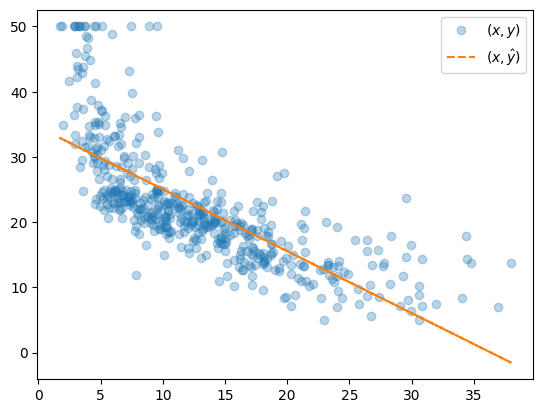

In [9]:
#| code-fold : true
plt.plot(x,y,"o",label = r"$(x,y)$",alpha=0.3)
plt.plot(x,yhat,"--",label = r"$(x,\hat {y})$")
plt.legend()

## `ModelSpec()` ($\star\star\star$)

`-` 우리는 앞서 다음과 같은 module을 import 했다

```python
from ISLP.models import (ModelSpec as MS,
summarize,poly)
```

`-` ModelSpec이라는 모듈을 `MS`로 사용할 것으로 지칭

`-` 이 모듈은 예측변수 $x$를 컴퓨터가 이해할 수 있게끔 변환해준다.

`-` step1. 전달할 $x$를 다음과 같이 전달

In [10]:
design = MS(['lstat'])

`-` step2. 컴퓨터가 이해할 수 있는 형태에 맞게 $x$를 변환 $\to$ 주어진 $x$를 매트릭스 형태로 변환해줌

In [11]:
X = design.fit_transform(Boston)

In [12]:
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


### 모델 적합

In [13]:
model = sm.OLS(y, X)
results = model.fit()

### 모델 요약

In [14]:
report = results.summary()

In [15]:
report.tables[0]

Dep. Variable:,medv,R-squared:,0.544
Model:,OLS,Adj. R-squared:,0.543
Method:,Least Squares,F-statistic:,601.6
Date:,"Sat, 09 Sep 2023",Prob (F-statistic):,5.08e-88
Time:,12:11:20,Log-Likelihood:,-1641.5
No. Observations:,506,AIC:,3287.
Df Residuals:,504,BIC:,3295.
Df Model:,1,,
Covariance Type:,nonrobust,,


`-` 이런식으로 위의 표에 대한 데이터도 확인할 수 있음

In [16]:
report.tables[0].data

[['Dep. Variable:', 'medv', '  R-squared:         ', '   0.544'],
 ['Model:', 'OLS', '  Adj. R-squared:    ', '   0.543'],
 ['Method:', 'Least Squares', '  F-statistic:       ', '   601.6'],
 ['Date:', 'Sat, 09 Sep 2023', '  Prob (F-statistic):', '5.08e-88'],
 ['Time:', '12:11:20', '  Log-Likelihood:    ', ' -1641.5'],
 ['No. Observations:', '   506', '  AIC:               ', '   3287.'],
 ['Df Residuals:', '   504', '  BIC:               ', '   3295.'],
 ['Df Model:', '     1', '                     ', ' '],
 ['Covariance Type:', 'nonrobust', '                     ', ' ']]

`-` 추정된 회귀계수값 확인

In [17]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

### 모델 해석1 (모델의 유의성)

In [18]:
report.tables[0]

Dep. Variable:,medv,R-squared:,0.544
Model:,OLS,Adj. R-squared:,0.543
Method:,Least Squares,F-statistic:,601.6
Date:,"Sat, 09 Sep 2023",Prob (F-statistic):,5.08e-88
Time:,12:11:20,Log-Likelihood:,-1641.5
No. Observations:,506,AIC:,3287.
Df Residuals:,504,BIC:,3295.
Df Model:,1,,
Covariance Type:,nonrobust,,


`-` 결정계수 ($R^2$) 값을 살펴보니 약 54%의 설명력을 가진 모델이다.

`-` 또한, F통계량에 근거한 `p-value` 값을 살펴보았을 때 주어진 표본으로 부터 추출된 모형은 통계적으로 유의하다.

### 모델 해석2 (예측변수의 유의성)

In [19]:
report.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


`-` `lstat`의 coef $\to$ 즉, 회귀계수에 대한 유의성 검정결과

* `p-value`값을 살펴본 결과 유의수준 0.05에서 유의성을 만족한다. 따라서 `lstat`의 회귀계수는 통계적으로 유의하다.

### 시각화

In [20]:
yhat = results.predict()
x = X["lstat"]

`-` 적합된 $(x,\hat y)$와 $(x,y)$를 시각화한 결과 몇몇 이상치를 제외하고 잘 예측하고 있는것 같다.

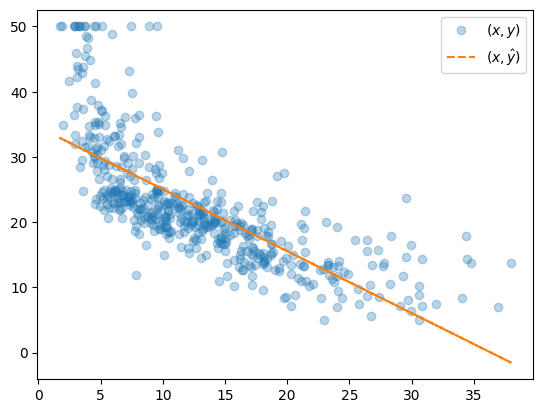

In [21]:
#| code-fold : true
plt.plot(x,y,"o",label = r"$(x,y)$",alpha=0.3)
plt.plot(x,yhat,"--",label = r"$(x,\hat {y})$")
plt.legend()

# Lab 2. 다중선형회귀

`-` 이번에는 `lstat`, `age`를 예측 변수 $\bf X$로 선언하고, 반응변수를 `medv`로 선언하고 개별 회귀계수의 유의성 검정

* 음.... 모두 유의미하게 나왔음!

In [25]:
X =MS(["lstat","age"]).fit_transform(Boston)

model1 = sm.OLS(y,X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


`-` 이번엔 반응변수를 제외한 모든 변수를 사용

In [28]:
terms = Boston.columns.drop("medv")
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [29]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)

results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


`-` 모델 적합결과 : `indus, age` 변수를 제외하고 모든 변수의 회귀계수가 유의미하게 나왔다.

`-` 근데, 우리는 유의미하게 나오지 않은 변수를 제외하고 모델을 만들고 싶음.

In [35]:
minus_age = Boston.columns.drop(["medv","age","indus"])

X = MS(minus_age).fit_transform(Boston)

model1= sm.OLS(y,X)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.4517,4.903,8.454,0.000
crim,-0.1217,0.033,-3.696,0.000
zn,0.0462,0.014,3.378,0.001
chas,2.8719,0.863,3.329,0.001
nox,-18.2624,3.565,-5.122,0.000
rm,3.6730,0.409,8.978,0.000
dis,-1.5160,0.188,-8.078,0.000
rad,0.2839,0.064,4.440,0.000
tax,-0.0123,0.003,-3.608,0.000
ptratio,-0.9310,0.130,-7.138,0.000


`-` 적합결과 모두 유의미하게 나왔다.

In [40]:
model1.fit().summary().tables[0]

Dep. Variable:,medv,R-squared:,0.734
Model:,OLS,Adj. R-squared:,0.729
Method:,Least Squares,F-statistic:,136.8
Date:,"Sat, 09 Sep 2023",Prob (F-statistic):,1.73e-135
Time:,12:32:49,Log-Likelihood:,-1505.0
No. Observations:,506,AIC:,3032.
Df Residuals:,495,BIC:,3078.
Df Model:,10,,
Covariance Type:,nonrobust,,


# Lab 3. VIF

`-` 분산팽창지수($\text{VIF}$)는 다음과 같이 정의된다.

$$\text{VIF}(\hat {\beta}_j) = \frac{1}{1- R^2_{X_j | X_{-j}}}$$

`-` 위 식을 해석하면 다음과 같다.

* $R^2_{X_j | X_{-j}}$  :  $X_j$를 반응변수로, $X_j$를 제외한 모든 변수들을 예측변수로 설정하였을 떄 산출되는 결정계수 값

* 위 식에서 $R^2_{X_j | X_{-j}}$ 크다는 것은 분모값이 작아지므로 $\text{VIF}(\hat {\beta}_j)$는 커지게된다. 

* 이말은, $X_j$가 다른 변수들과의 연관성이 높아 다중공선성 문제가 의심된다는 것이다.

* 보통 `5~ 10`을 초과하면 다중공선성의 문제가 있다고 본다.

`-` 코드 작성

In [76]:
# step 1.  X 생성

term  = Boston.columns.drop("medv") 
X = MS(terms).fit_transform(Boston)
col = X.columns

# step 2.  각 예측변수의 분산팽창지수 계산
pd.DataFrame({col[i]: [VIF(X,i)] for i in range(1,X.shape[1])})

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,1.767486,2.298459,3.987181,1.071168,4.369093,1.912532,3.088232,3.954037,7.445301,9.002158,1.79706,2.870777


`-` 음... 결과를 보니 `tax, rad`의 경우 분산팽창지수가 높게 나왔다.

* 주성분 분석이나, 요인 분석을 통해 해당 변수를 합쳐서 해결하는 방안이 있다.

* Ridge, Lasso 회귀분석을 이용

* 해당 변수를 제거 (**그러나 해당 변수가 분석에서 중요한 경우가 있기 때문에, 연관성이 높은 변수들끼리 합쳐 평균을 내던지... 등등에 방법이 이용되나 이도 완벽하지 않음 **)

# Lab 4. Qualitative Predictors

`MS` 함수는 범주형 변수를 자동으로  `원핫 인코딩`을 수행해준다!! 얼마나 편한가~~

In [100]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [122]:
x = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']

X = MS(x).fit_transform(Carseats)
model = sm.OLS(y,X)
model.fit().summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.873
Model:,OLS,Adj. R-squared:,0.870
Method:,Least Squares,F-statistic:,243.4
Date:,"Sat, 09 Sep 2023",Prob (F-statistic):,1.60e-166
Time:,13:08:45,Log-Likelihood:,-568.99
No. Observations:,400,AIC:,1162.
Df Residuals:,388,BIC:,1210.
Df Model:,11,,
Covariance Type:,nonrobust,,


In [123]:
model.fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
intercept,5.6606,0.603,9.380,0.000,4.474,6.847
CompPrice,0.0928,0.004,22.378,0.000,0.085,0.101
Income,0.0158,0.002,8.565,0.000,0.012,0.019
Advertising,0.1231,0.011,11.066,0.000,0.101,0.145
Population,0.0002,0.000,0.561,0.575,-0.001,0.001
Price,-0.0954,0.003,-35.700,0.000,-0.101,-0.090
ShelveLoc[Good],4.8502,0.153,31.678,0.000,4.549,5.151
ShelveLoc[Medium],1.9567,0.126,15.516,0.000,1.709,2.205
Age,-0.0460,0.003,-14.472,0.000,-0.052,-0.040
Education,-0.0211,0.020,-1.070,0.285,-0.060,0.018


## summary : Lab

`-` 구구절절 말이 많았지만, 회귀모형 적합 시 아래의 step을 기억하자.

```python

# step 0. import
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
summarize,poly)

# step 1. x, y를 저장
x = data.columns.drop("target") 
y = data["target"]

# step 2.  matrix 형태의 X 생성
X = MS(final).fit_transform(data)

# step 3. 최소제곱법(OLS)를 이용하여 모델을 적합하겠다고 선언
model = sm.OLS(y,X)

# step 4. 모형에 대한 유의성 확인
model.fit().summary().tables[0]

# step 5. 개별 회귀계수에 대한 유의성 확인
model.fit().summary().tables[1]

```